# **Simple feed forward neural network with Pytorch.**

We are creating a simple model using torch.nn.Module, This tutoril is framed in these steps:



1.   Importing he standard libraries we need.
2.   Setup device agnostic code.

3.   Data preparation.
4.   Building a PyTorch linear model.
5.   Training the model.
6.   Making predictions.
7.   Saving and loading a model.



# 1- Importing Pytorch and Matplotlib.


In [ ]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt

#  Check Pytorch version.
torch.__version__

'1.13.1+cu116'

# 2-Using GPU for better performence.

  Note: If you're using Google Colab, to setup a GPU, go to Runtime -> Change runtime type -> Hardware acceleration -> GPU. If you do this, it will reset the Colab runtime and you will lose saved variables.


Now let's start making our code device agnostic by setting device="cuda" if it's available, otherwise it'll default to device="cpu".

In [ ]:
device = "cuda" if torch.cuda.is_available else "cpu"
print(f"Using device is : {device}")

Using device is : cuda


# 3-Data

We are going to create out data and labels using simple torch tensors:

First, we'll hard-code some weight and bias values.

Then we'll make a range of numbers between 0 and 1, these will be our X values.

Finally, we'll use the X values, as well as the weight and bias values to create y using the linear regression formula (y = weight * X + bias)

In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.53

# Create train data 
X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)



# Create labels for train data
y = weight*X + bias

# visualize out data
print(f"train data :{X} \n lables :{y}")


train data :tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) 
 lables :tensor([[0.5300],
        [0.5440],
        [0.5580],
        [0.5720],
     

Let's split it into training and test sets.

We'll use an 80/20 split with 80% training data and 20% testing data.

In [ ]:
# Split data
train_split = int(len(X)*0.8)
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)


(40, 40, 10, 10)

# Define a function to plot our data: 

Now let's create a function to plot our data and predctions using matplotlib

In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot train data in red: 
  plt.scatter(train_data, train_labels, c="r", s=4, label="training Data")

  # Plot test data in green: 
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing Data")
  
  # Plot predictions

  if predictions is not None: 
    plt.scatter(test_data, predictions, c="b", label ="Preds on test data")
  # Show the legend
  plt.legend(prop={"size": 14});

# -Visulize the data:

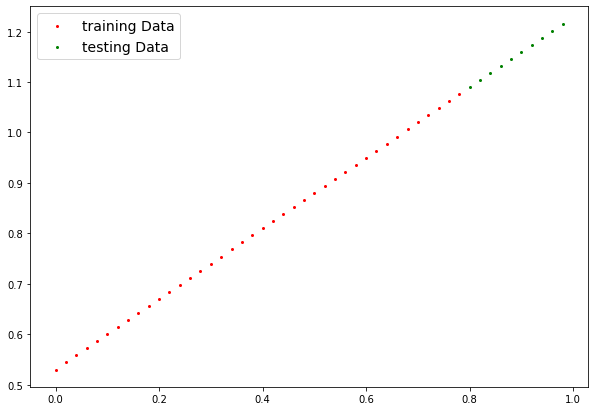

In [ ]:
# Now we can use our function to see our data and better understanding it 

plot_predictions();

 The train data in represented in RED, test data in GREEN.

# 4- Build Model

Let's replicate a standard linear regression model using pure PyTorch.

In [ ]:
"""class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, 1)# <- start with random weights (this will get adjusted as the model learns)
                                          ,dtype=torch.float32,# <- PyTorch uses float32 by default
                                          requires_grad=True # requiring gradient on a parameter tensor is important to use SGD to optimize it 
                                )
    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float32,
                                         requires_grad=True))
    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor)->torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
       return self.weights * x + self.bias          # <- this is the linear regression formula (y = m*x + b)  """          

'class LinearRegressionModel(nn.Module):\n  def __init__(self):\n    super().__init__()\n\n    self.weights = nn.Parameter(torch.randn(1, 1)# <- start with random weights (this will get adjusted as the model learns)\n                                          ,dtype=torch.float32,# <- PyTorch uses float32 by default\n                                          requires_grad=True # requiring gradient on a parameter tensor is important to use SGD to optimize it \n                                )\n    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float32,\n                                         requires_grad=True))\n    # Forward defines the computation in the model\n    def forward(self, x: torch.Tensor)->torch.Tensor: # <- "x" is the input data (e.g. training/testing features)\n       return self.weights * x + self.bias          # <- this is the linear regression formula (y = m*x + b)  '

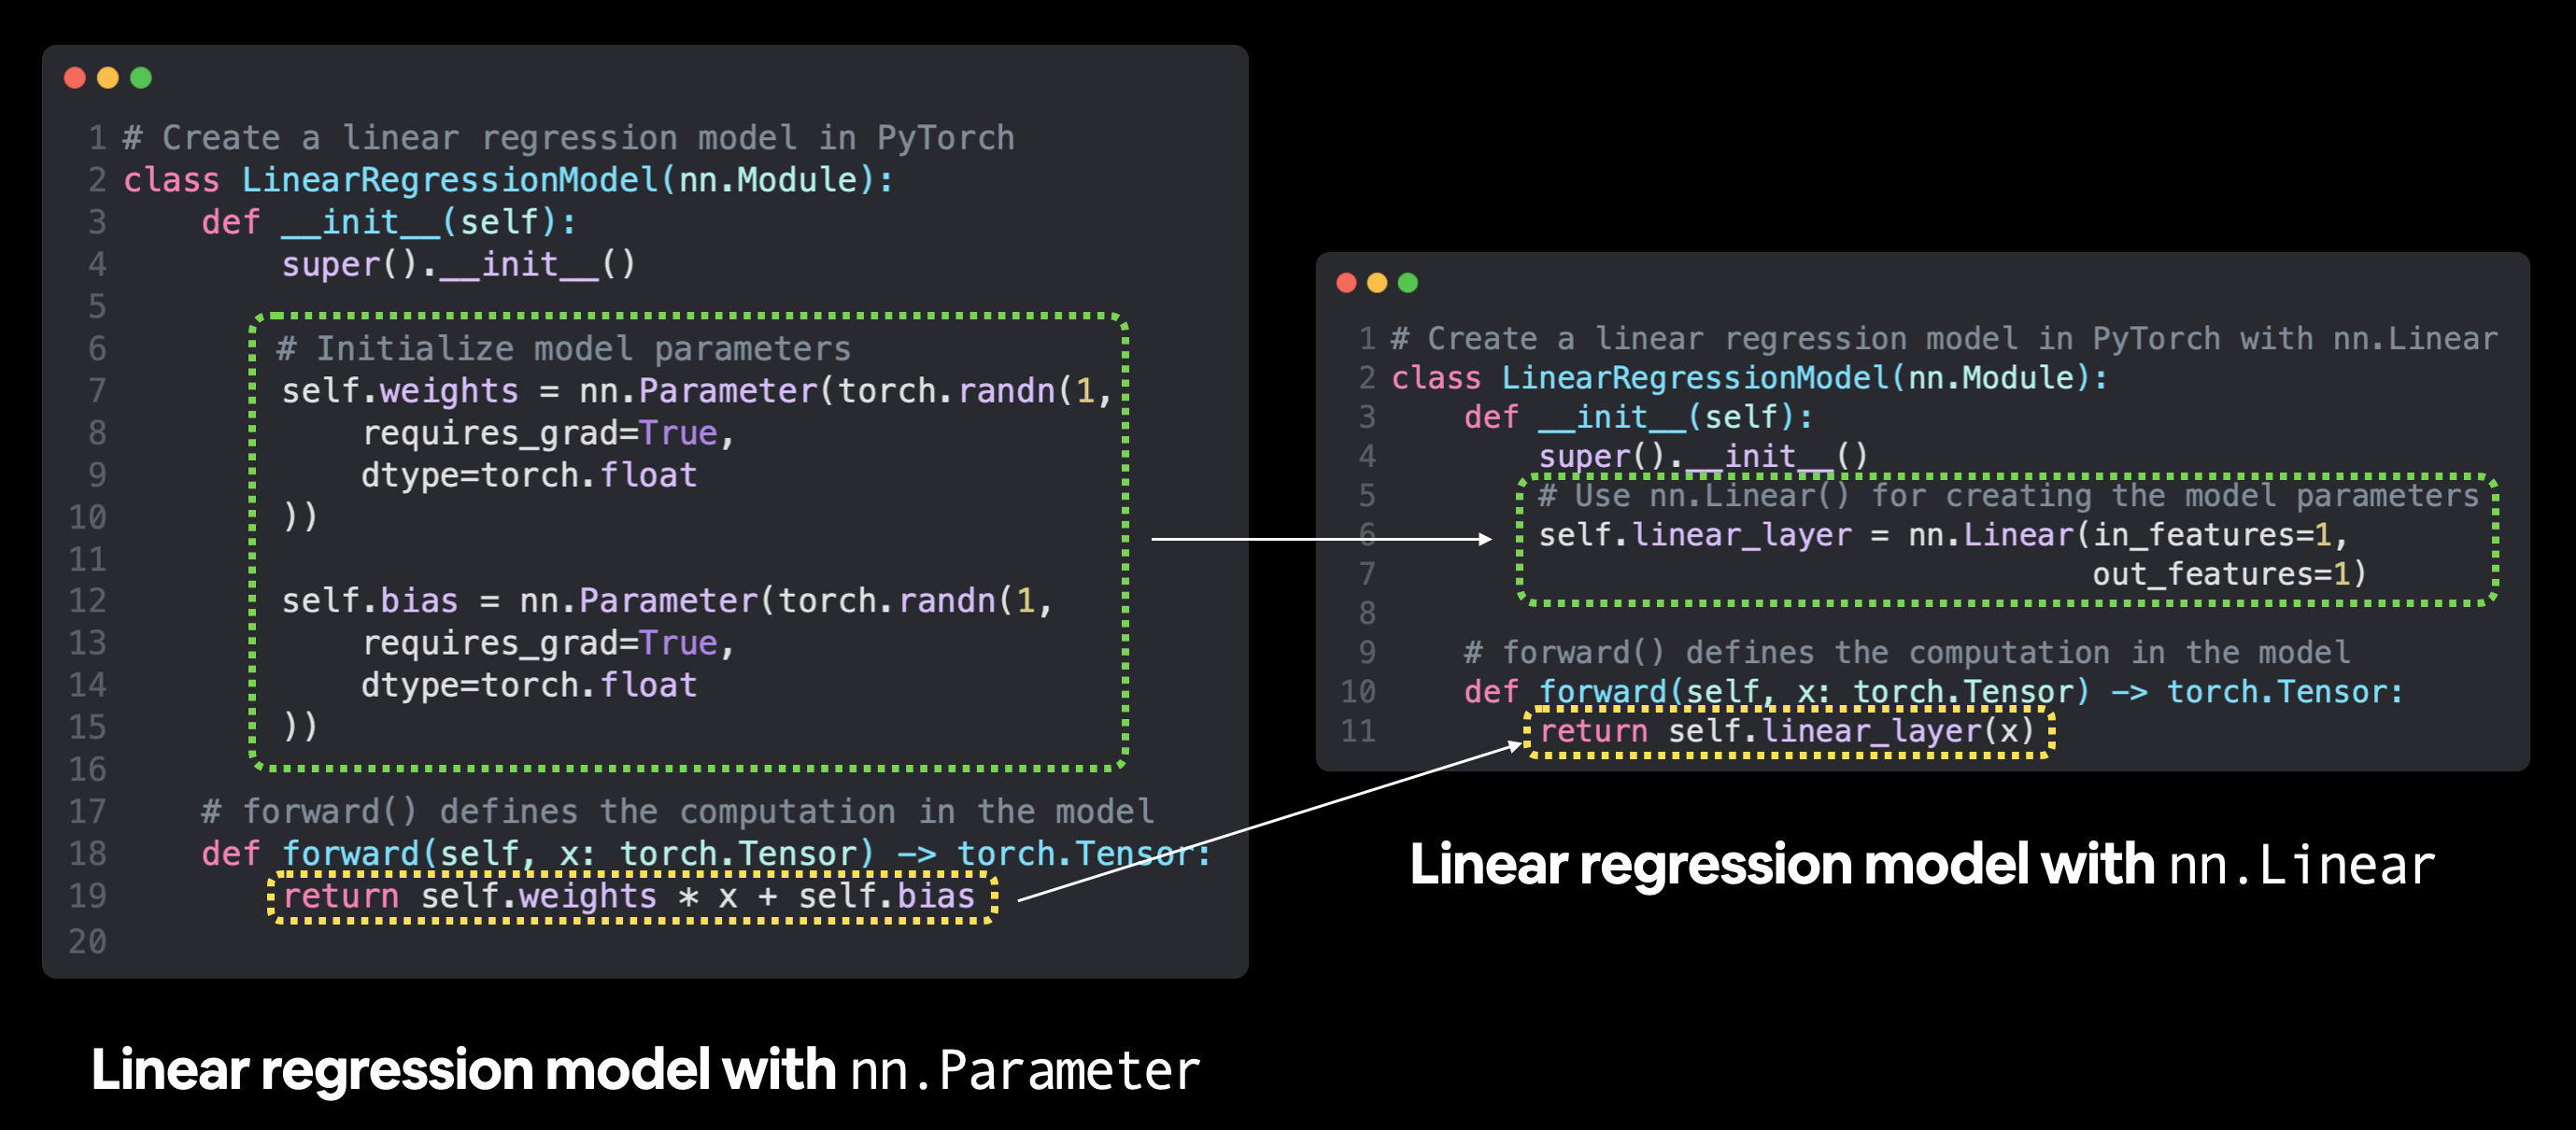

- As shown above we used nn.Prameter from the nn.Module class to create our parameters 

Creating a linear regression model using nn.Parameter versus using nn.Linear. There are plenty more examples of where the torch.nn module has pre-built computations, including many popular and useful neural network layers.

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1) # Using a 16 as a size for the features (input), and we choose the size of the input so the nn.linear function can create random parameters which a particular shape. 
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))


Notice the outputs of model_1.state_dict(), the nn.Linear() layer created a random weight and bias parameter for us.

Now let's put our model on the GPU (if it's available).

We can change the device our PyTorch objects are on using .to(device).

In [ ]:
# Check model device
next(model_1.parameters()).device

# Set the device to GPU if available, otherwise it will use CPU
model_1.to(device)

# Check the device
next(model_1.parameters()).device 


device(type='cuda', index=0)

# 5-Training the model:


Time to build a training and testing loop.

Let's use L1loss as a loss function and torch.optim.SGD() as an optimizer.

- Here you can learn more about the optimizer and the loss function used:


*   [Click here for for L1loss](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)



*   [stochastic gradient descent in Pytorch](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)






In [ ]:
# Optimizer 
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

# Loss function 
loss_func = torch.nn.L1Loss()

- lr stands for learning rate and that mean how big are the gradient decent steps when training the model, having a big lr may create a none useful model and using a very samll lr may take a lot of time to run.

# Training and testing loop

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (iterations)
epochs = 1000

# Put data on the available device
X_train = x_train.to(device)
Y_train = y_train.to(device)
X_test = x_test.to(device)
Y_test = y_test.to(device)

for epoch in range(epochs):
  
  ## Puting the model in training mode 
  model_1.train()

  # 1- forward pass

  preds = model_1(X_train)

  # 2- Calculate loss

  loss = loss_func(preds, Y_train)

  # 3- Use zerp grad to not track to gradients of the parameters 

  optimizer.zero_grad()

  # 4- Compute the backpropagation algorithm
  loss.backward()

  # 5- Compute gradient decent to change parameeters

  optimizer.step()

  ## Testing

  model_1.eval() # put the model in evaluation mode for testing (inference)

  # 1- forward pass
  with torch.inference_mode():
    test_pred = model_1(X_test)
    # 2- calculate the loss
    test_loss = loss_func(test_pred, Y_test)
    if epoch % 50 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 0.32517796754837036 | Test loss: 0.34397631883621216
Epoch: 50 | Train loss: 0.0015036121476441622 | Test loss: 0.005091071128845215
Epoch: 100 | Train loss: 0.0070364996790885925 | Test loss: 0.007680070586502552
Epoch: 150 | Train loss: 0.0070364996790885925 | Test loss: 0.007680070586502552
Epoch: 200 | Train loss: 0.0070364996790885925 | Test loss: 0.007680070586502552
Epoch: 250 | Train loss: 0.0070364996790885925 | Test loss: 0.007680070586502552
Epoch: 300 | Train loss: 0.0070364996790885925 | Test loss: 0.007680070586502552
Epoch: 350 | Train loss: 0.0070364996790885925 | Test loss: 0.007680070586502552
Epoch: 400 | Train loss: 0.0070364996790885925 | Test loss: 0.007680070586502552
Epoch: 450 | Train loss: 0.0070364996790885925 | Test loss: 0.007680070586502552
Epoch: 500 | Train loss: 0.0070364996790885925 | Test loss: 0.007680070586502552
Epoch: 550 | Train loss: 0.0070364996790885925 | Test loss: 0.007680070586502552
Epoch: 600 | Train loss: 0.0070364

Let's check the parameters our model has learned and compare them to the original parameters we hard-coded.

In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6975]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5380], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.53


# 6- Making predictions


In [ ]:
# Turn the model into evaluation mode 
model_1.eval()

with torch.inference_mode():

  # Make predictions of test data
  y_preds = model_1(X_test)
y_preds

tensor([[1.0960],
        [1.1100],
        [1.1239],
        [1.1379],
        [1.1518],
        [1.1658],
        [1.1797],
        [1.1937],
        [1.2076],
        [1.2216]], device='cuda:0')

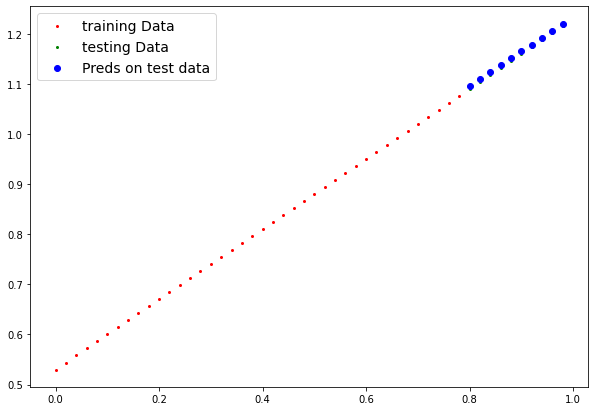

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

# 7- Saving and loading the model

We are happy with ou predictions, now let's save the model

In [ ]:
from pathlib import Path
# create a directory for models 

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok =True)

# 2- Create modle save path
MODEL_NAME = "01_pytorch_basics.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3- Save the model state dictionary
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_basics.pth


To make sure everything works well, let's load our model using another model from our linearregression class 


In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


Let's evaluate this loaded model.

In [ ]:
loaded_model_1.eval()

with torch.inference_mode():
  new_preds = loaded_model_1(X_test)
# Check if the y_preds are the same with those predictions 
y_preds == new_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')